# Mobile Price Classification using Python
##### So, since our task is to classify the price range of mobile phones  and not to predict the actual prices, so here I am going to train a classification model to classify the price range of mobile phones as:

##### 0 (low cost) 
##### 1 (medium cost)
##### 2 (high cost)
##### 4 (very high cost)

##### I will start the task of mobile price classification with machine learning by importing the necessary Python libraries and the dataset:

In [1]:
# Importing all the required packages and libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
%matplotlib inline

C:\Users\BIMAL DAS\AppData\Local\Temp\ipykernel_27380\2498562384.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Reading the data from an external source

df = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/mobile_prices.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

df.isnull().sum()

### So the dataset contains 21 columns and luckily this dataset has no missing values, so we can just start by training the model, but before that let’s take a look at the correlation between the features in the dataset:

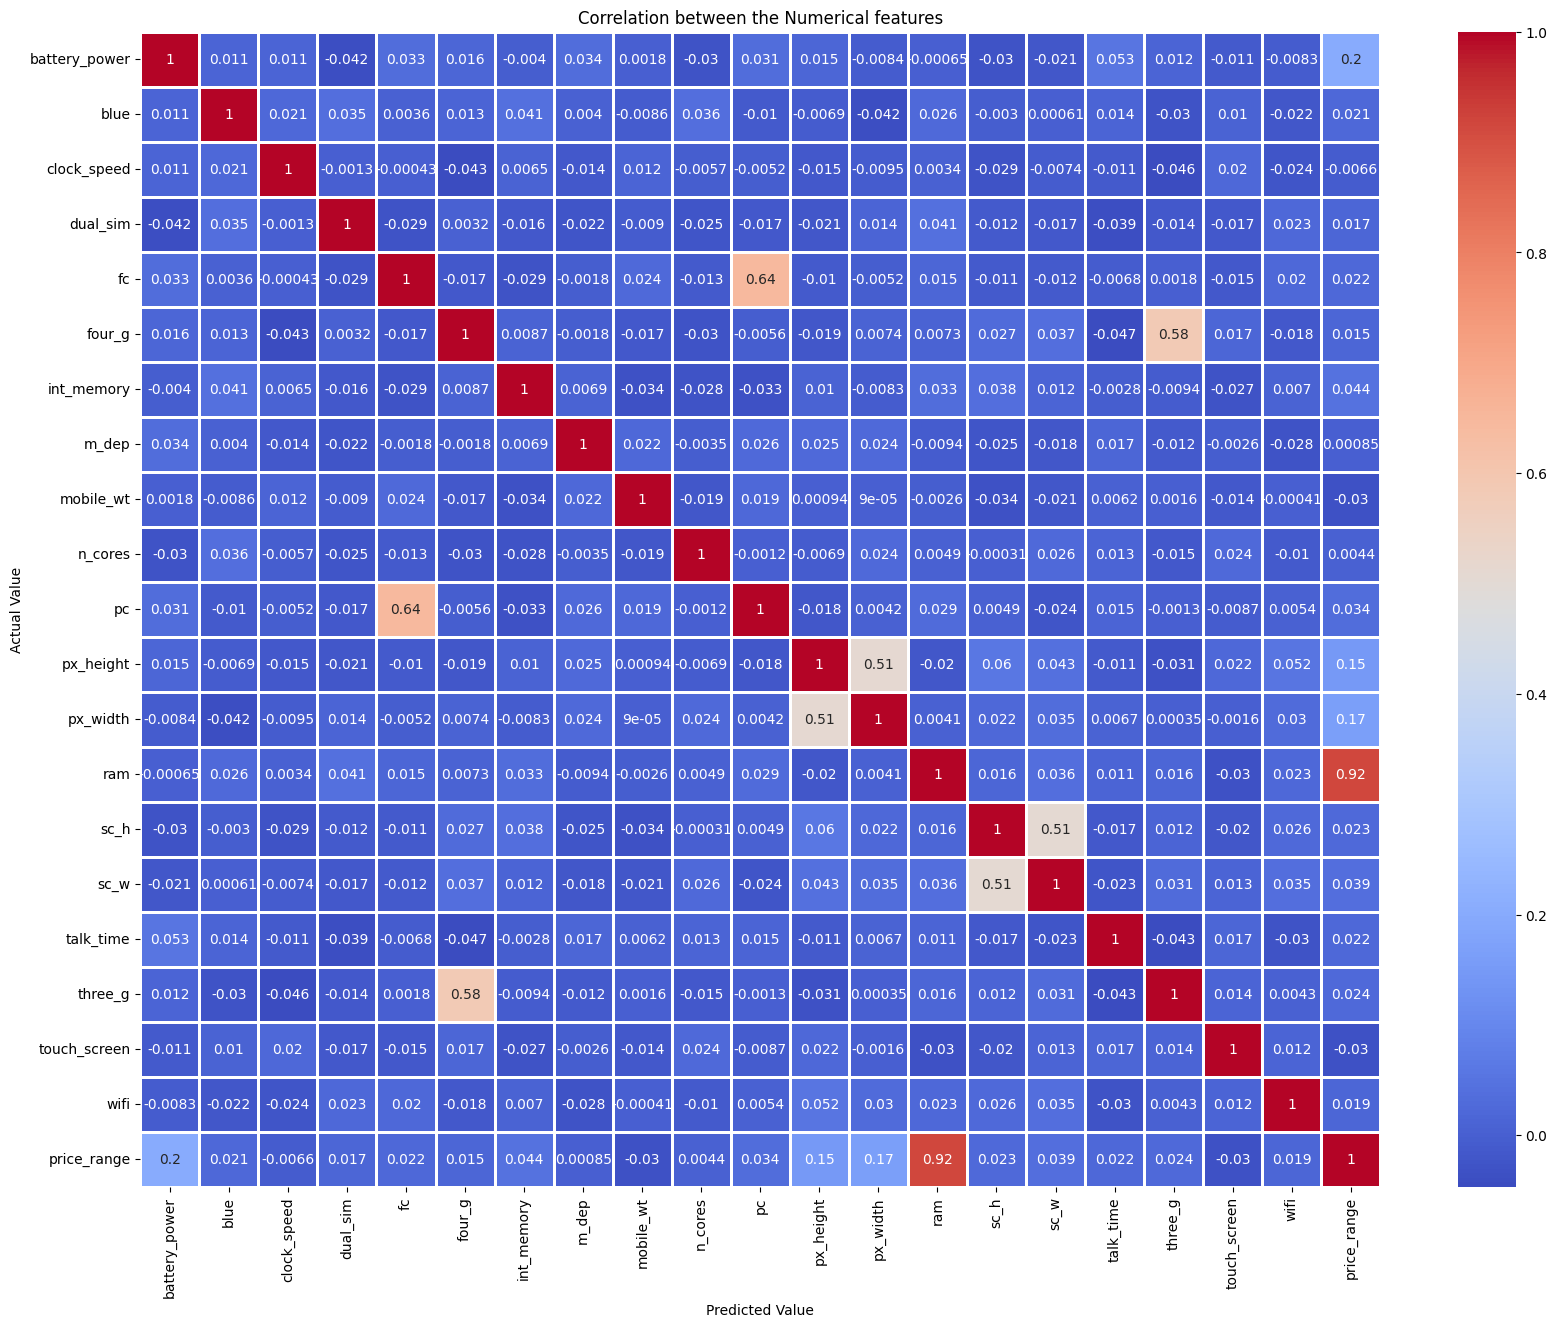

In [13]:
# correlation between the features in the dataset:

plt.figure(figsize = (20,15))
sns.heatmap(df.corr(),annot = True, cmap = "coolwarm", linecolor = "white", linewidths = 2)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title("Correlation between the Numerical features")
plt.show()

### Data Preprocessing

In [5]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [6]:
# Preprocessing/Normalizing the data using StandardScaler

ss = StandardScaler()
X = ss.fit_transform(X)

In [7]:
# Splitting the data into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

In [8]:
# Using Logistic Regression for classification

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [9]:
# checking the accuracy of our model

acs = accuracy_score(y_test,y_pred)
acs

0.97

<Axes: >

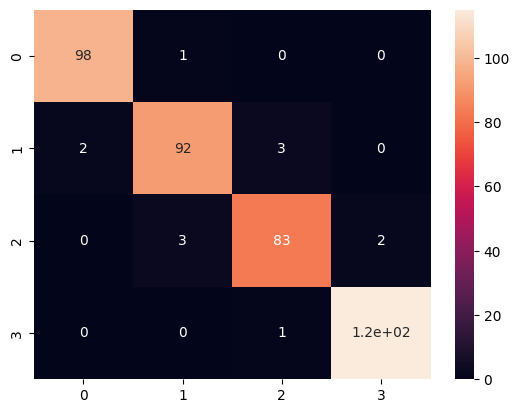

In [10]:
# Confusion matrix 

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [11]:
# values predicted by our model

print(y_pred)

[3 0 1 1 2 1 3 3 3 1 1 0 1 0 3 1 0 2 3 1 3 0 2 0 3 3 1 0 1 0 3 0 2 2 1 3 1
 3 2 3 2 1 2 0 3 3 1 0 3 2 3 0 3 2 0 2 3 1 2 0 0 3 1 0 1 0 0 1 3 0 1 0 3 3
 1 2 1 1 3 3 0 3 0 0 3 3 2 0 0 3 3 3 2 1 1 3 2 0 3 0 2 1 0 0 3 0 3 1 0 2 3
 1 0 1 2 3 0 0 2 1 1 3 2 2 2 1 3 2 1 0 3 2 3 0 0 0 0 1 3 3 1 2 3 2 1 1 1 3
 3 2 0 1 3 0 3 3 3 2 1 2 1 3 3 1 1 0 3 0 1 1 3 3 1 0 2 2 0 3 0 2 2 0 2 3 2
 1 2 3 1 1 1 0 1 3 0 0 1 3 2 1 0 3 3 0 3 1 0 2 1 2 1 1 3 3 3 3 0 0 3 3 3 2
 1 1 3 0 2 3 2 3 3 1 3 2 2 0 0 3 3 1 0 1 0 3 1 3 0 1 3 0 0 0 3 1 0 2 3 0 1
 0 0 1 0 1 3 3 3 2 2 1 1 1 2 3 1 2 2 3 2 3 1 2 0 2 1 2 2 3 2 1 1 1 3 2 3 0
 0 1 1 1 3 1 0 1 1 0 1 3 0 1 3 0 2 3 3 0 1 2 0 1 3 1 0 2 1 3 0 1 3 2 3 3 3
 3 3 2 3 2 2 2 0 2 0 1 0 3 3 2 1 2 0 2 2 3 2 0 0 2 0 0 0 3 3 2 0 0 3 3 1 2
 2 0 2 0 2 2 1 3 2 1 1 2 0 2 2 3 1 0 2 3 0 2 0 0 0 2 3 0 2 3]


### The above output shows the price range classified by the model. 
### Let’s have a look at the number of mobile phones classified for each price range:

In [12]:
# Number of phones classified for each price range

(unique, counts) = np.unique(y_pred, return_counts = True)
price_range = np.asarray((unique, counts)).T
print(price_range)

[[  0 100]
 [  1  96]
 [  2  87]
 [  3 117]]
